<a href="https://colab.research.google.com/github/MatheusHavoc/Case-Nps-Analista-de-Planejamento-2/blob/main/Case_Nps_Planejamento_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Contextualização

**Deve conter:**
* Resultado Diário
* Resultado mensal
* Resultado por quadrante Tribo Fintech_x01 e por mês
* Visão Por produto
* Visão Por Supervisor
* Visão Por Agente
* Quartil por agentes
* Nuvem de Palavras
* Relação de Top de Nuvem de Palavras para piores e para melhores notas
* Share de produtos em percentual
* Filtros que interajam com todas as visões que precisam ter interação com o filtro

**Responder as perguntas:**
* Qual produto tem maior NPS?
* Qual o pareto de impacto de menor NPS, pelas situações diversas? 
* Fazer mais de 01 gráfico de pareto.
* Quais agentes são reincidentes em 4Q no ultimo Bimestre?
* Qual o pareto de impacto de menor NPS?
* Há Sazonalidade dentro do ano e do mês?
* Qual a solução proposta para aumentar o NPS?

#Instalações Bibliotecas

In [ ]:
import pandas as pd
import numpy as np

import plotly.express as px

#Base de dados


In [ ]:
from google.colab import files
uploaded = files.upload()

Saving CASE PARA VAGA DE PLANEJAMENTO - BI (1) (1).xlsx to CASE PARA VAGA DE PLANEJAMENTO - BI (1) (1).xlsx


In [ ]:
df = pd.read_excel('CASE PARA VAGA DE PLANEJAMENTO - BI (1) (1).xlsx')

In [ ]:
df

,Unnamed: 0,Nome,Data da Opinião,Nota,Produto,Escala,Campanha,Tribo Fintech_x01,Supervisão,Comentário
0,NaN,AGENTE_1,2022-01-01,9,Portal,07:30 - 13:50,NPS - Central de Ajuda (Prod.),Central de Ajuda,Super_1,Atendente Atenciosa E Educada Disposta A Ajuda...
1,NaN,AGENTE_2,2022-01-01,10,Consulta à Fintech_x01,11:20 - 19:32,NPS - Atendimento Premium (0800),0800 Premium,Super_2,NaN
2,NaN,AGENTE_2,2022-01-01,10,Negativação,11:20 - 19:32,NPS - Atendimento Premium (0800),0800 Premium,Super_2,Ótimo O Atendimento Parabéns
3,NaN,AGENTE_3,2022-01-01,10,Portal,07:30 - 13:50,NPS - Central de Ajuda (Prod.),Central de Ajuda,Super_3,"Excelente Atendimento,Me Ajudou Em Tudo Que Eu..."
4,NaN,AGENTE_4,2022-01-01,7,Portal,07:30 - 13:50,NPS - Central de Ajuda (Prod.),Central de Ajuda,Super_1,NaN
...,...,...,...,...,...,...,...,...,...,...
138241,NaN,AGENTE_210,2023-03-20,10,Limpa Nome,13:50 - 20:10,RV - CA - Tribo de Dívidas,Central de Ajuda,Super_29,Conseguir Resolver
138242,NaN,AGENTE_210,2023-03-20,10,Limpa Nome,13:50 - 20:10,RV - CA - Tribo de Dívidas,Central de Ajuda,Super_29,Tempo
138243,NaN,AGENTE_554,2023-03-20,0,Autenticação,13:50 - 20:10,RV - Central de Ajuda,Central de Ajuda,Super_29,NaN
138244,NaN,AGENTE_554,2023-03-20,0,Autenticação,13:50 - 20:10,RV - Central de Ajuda,Central de Ajuda,Super_29,"O Site É Extremamente Complicado, Não Tem Uma ..."


# Entendimento dos dados

* Nome: Nome do agente que atendeu a opinião do cliente.
* Data da Opinião: Data em que a opinião do cliente foi registrada.
* Nota: Nota atribuída pelo cliente ao produto ou atendimento recebido. A escala de notas pode variar de acordo com a campanha.
* Produto: Nome do produto ou serviço que foi avaliado pelo cliente.
* Escala: Faixa horária em que a opinião do cliente foi registrada.
* Campanha: Nome da campanha a que a opinião do cliente se refere.
Tribo Fintech_x01: Nome da equipe ou departamento responsável pela campanha.
* Supervisão: Nome do supervisor do agente que atendeu a opinião do cliente.
* Comentário: Comentário deixado pelo cliente ao avaliar o produto ou atendimento recebido.

In [ ]:
df.head(4)

,Unnamed: 0,Nome,Data da Opinião,Nota,Produto,Escala,Campanha,Tribo Fintech_x01,Supervisão,Comentário
0,NaN,AGENTE_1,2022-01-01,9,Portal,07:30 - 13:50,NPS - Central de Ajuda (Prod.),Central de Ajuda,Super_1,Atendente Atenciosa E Educada Disposta A Ajuda...
1,NaN,AGENTE_2,2022-01-01,10,Consulta à Fintech_x01,11:20 - 19:32,NPS - Atendimento Premium (0800),0800 Premium,Super_2,NaN
2,NaN,AGENTE_2,2022-01-01,10,Negativação,11:20 - 19:32,NPS - Atendimento Premium (0800),0800 Premium,Super_2,Ótimo O Atendimento Parabéns
3,NaN,AGENTE_3,2022-01-01,10,Portal,07:30 - 13:50,NPS - Central de Ajuda (Prod.),Central de Ajuda,Super_3,"Excelente Atendimento,Me Ajudou Em Tudo Que Eu..."


# Tratamento detalhado das colunas

'Unnamed: 0' será removido pós pandas já possui índex próprio 

In [ ]:
df.drop('Unnamed: 0', axis=1, inplace=True)

In [ ]:
df.head(4)

,Nome,Data da Opinião,Nota,Produto,Escala,Campanha,Tribo Fintech_x01,Supervisão,Comentário
0,AGENTE_1,2022-01-01,9,Portal,07:30 - 13:50,NPS - Central de Ajuda (Prod.),Central de Ajuda,Super_1,Atendente Atenciosa E Educada Disposta A Ajuda...
1,AGENTE_2,2022-01-01,10,Consulta à Fintech_x01,11:20 - 19:32,NPS - Atendimento Premium (0800),0800 Premium,Super_2,NaN
2,AGENTE_2,2022-01-01,10,Negativação,11:20 - 19:32,NPS - Atendimento Premium (0800),0800 Premium,Super_2,Ótimo O Atendimento Parabéns
3,AGENTE_3,2022-01-01,10,Portal,07:30 - 13:50,NPS - Central de Ajuda (Prod.),Central de Ajuda,Super_3,"Excelente Atendimento,Me Ajudou Em Tudo Que Eu..."


As variáveis estão no formato certo

In [ ]:
# Tipos dos dados
df.dtypes

Nome                         object
Data da Opinião      datetime64[ns]
Nota                          int64
Produto                      object
Escala                       object
Campanha                     object
Tribo Fintech_x01            object
Supervisão                   object
Comentário                   object
dtype: object

A coluna "Comentário" apresenta 56940 valores nulos. No entanto, considerando que outras colunas ainda possuem informações relevantes para análise, os valores nulos "Comentário" não será removida neste momento. Entretanto, será realizada uma análise mais aprofundada para tentar identificar possíveis informações repetidas ou padrões que possam ser úteis para a análise.

In [ ]:
( 
    df.isna().sum()
    .to_frame('df_Faltantes')
    
)

,df_Faltantes
Nome,0
Data da Opinião,0
Nota,0
Produto,0
Escala,0
Campanha,0
Tribo Fintech_x01,0
Supervisão,0
Comentário,56940


Realizando uma verificação para identificar se há valores duplicados nas colunas

In [ ]:
duplicatas = df.duplicated(subset=['Nome', 'Data da Opinião', 'Nota', 'Produto', 'Escala', 'Campanha', 'Tribo Fintech_x01', 'Supervisão','Comentário'], keep=False)
print(duplicatas.value_counts())

False    115033
True      23213
dtype: int64


Resultados :
* Não duplicatas (False) - 115033
* Duplicatas (True) - 23213

Removendo duplicados

In [ ]:
df_sem_dup = df.drop_duplicates(subset=['Nome', 'Data da Opinião', 'Nota', 'Produto', 'Escala', 'Campanha', 'Tribo Fintech_x01', 'Supervisão' ,'Comentário'], keep='first', inplace=False)
df_sem_dup.head(4)

,Nome,Data da Opinião,Nota,Produto,Escala,Campanha,Tribo Fintech_x01,Supervisão,Comentário
0,AGENTE_1,2022-01-01,9,Portal,07:30 - 13:50,NPS - Central de Ajuda (Prod.),Central de Ajuda,Super_1,Atendente Atenciosa E Educada Disposta A Ajuda...
1,AGENTE_2,2022-01-01,10,Consulta à Fintech_x01,11:20 - 19:32,NPS - Atendimento Premium (0800),0800 Premium,Super_2,NaN
2,AGENTE_2,2022-01-01,10,Negativação,11:20 - 19:32,NPS - Atendimento Premium (0800),0800 Premium,Super_2,Ótimo O Atendimento Parabéns
3,AGENTE_3,2022-01-01,10,Portal,07:30 - 13:50,NPS - Central de Ajuda (Prod.),Central de Ajuda,Super_3,"Excelente Atendimento,Me Ajudou Em Tudo Que Eu..."


* Considerando a possibilidade de que alguns valores possam estar escritos com grafias diferentes (minúsculas e maiúsculas). Embora haja muitos agentes nas outras colunas, é fácil identificar visualmente se os valores nessas colunas estão corretos ou não.

* É importante realizar essa verificação para garantir que não haja valores duplicados nas colunas de texto, o que poderia levar a resultados imprecisos em análises posteriores.

In [ ]:
print(df_sem_dup['Nome'].unique())
print('-'*25)
print(df_sem_dup['Nota'].unique())
print('-'*25)
print(df_sem_dup['Produto'].unique())
print('-'*25)
print(df_sem_dup['Escala'].unique())
print('-'*25)
print(df_sem_dup['Campanha'].unique())
print('-'*25)
print(df_sem_dup['Tribo Fintech_x01'].unique())
print('-'*25)
print(df_sem_dup['Supervisão'].unique())

['AGENTE_1' 'AGENTE_2' 'AGENTE_3' 'AGENTE_4' 'AGENTE_5' 'AGENTE_6'
 'AGENTE_7' 'AGENTE_8' 'AGENTE_9' 'AGENTE_10' 'AGENTE_11' 'AGENTE_12'
 'AGENTE_13' 'AGENTE_14' 'AGENTE_15' 'AGENTE_16' 'AGENTE_17' 'AGENTE_18'
 'AGENTE_19' 'AGENTE_20' 'AGENTE_21' 'AGENTE_22' 'AGENTE_23' 'AGENTE_24'
 'AGENTE_25' 'AGENTE_26' 'AGENTE_27' 'AGENTE_28' 'AGENTE_29' 'AGENTE_30'
 'AGENTE_31' 'AGENTE_32' 'AGENTE_33' 'AGENTE_34' 'AGENTE_35' 'AGENTE_36'
 'AGENTE_37' 'AGENTE_38' 'AGENTE_39' 'AGENTE_40' 'AGENTE_41' 'AGENTE_42'
 'AGENTE_43' 'AGENTE_44' 'AGENTE_45' 'AGENTE_46' 'AGENTE_47' 'AGENTE_48'
 'AGENTE_49' 'AGENTE_50' 'AGENTE_51' 'AGENTE_52' 'AGENTE_53' 'AGENTE_54'
 'AGENTE_55' 'AGENTE_56' 'AGENTE_57' 'AGENTE_58' 'AGENTE_59' 'AGENTE_60'
 'AGENTE_61' 'AGENTE_62' 'AGENTE_63' 'AGENTE_64' 'AGENTE_65' 'AGENTE_66'
 'AGENTE_67' 'AGENTE_68' 'AGENTE_69' 'AGENTE_70' 'AGENTE_71' 'AGENTE_72'
 'AGENTE_73' 'AGENTE_74' 'AGENTE_75' 'AGENTE_76' 'AGENTE_77' 'AGENTE_78'
 'AGENTE_79' 'AGENTE_80' 'AGENTE_81' 'AGENTE_82' 'AGENTE_83'

In [ ]:
# Verificar as estatísticas básicas das colunas
df_sem_dup.describe(include='all', datetime_is_numeric=True).T

,count,unique,top,freq,mean,min,25%,50%,75%,max,std
Nome,123959,600,AGENTE_35,5810,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Data da Opinião,123959,NaN,NaN,NaN,2022-08-04 10:23:54.725998080,2022-01-01 00:00:00,2022-04-06 00:00:00,2022-07-27 00:00:00,2022-12-06 00:00:00,2023-03-20 00:00:00,NaN
Nota,123959.0,NaN,NaN,NaN,8.985995,0.0,9.0,10.0,10.0,10.0,2.320004
Produto,123959,26,Limpa Nome,30268,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Escala,123959,25,08:00 - 16:12,28330,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Campanha,123959,24,NPS - Atendimento Premium (0800),34768,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Tribo Fintech_x01,123959,7,0800 Premium,54944,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Supervisão,123959,31,Super_6,15941,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Comentário,78979,48718,0,9119,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
total_respostas = df_sem_dup['Nota'].count()

promotores = df_sem_dup.loc[df_sem_dup['Nota'] >= 9, 'Nota']
num_promotores = promotores.count()


neutros = df_sem_dup.loc[(df['Nota'] >= 7) & (df_sem_dup['Nota'] <= 8), 'Nota']
num_neutros = neutros.count()

detratores = df_sem_dup.loc[df_sem_dup['Nota'] <= 6, 'Nota']
num_detratores = detratores.count()

perc_promotores = (num_promotores / total_respostas) * 100
perc_neutros = (num_neutros / total_respostas) * 100
perc_detratores = (num_detratores / total_respostas) * 100

nps = perc_promotores - perc_detratores
print('-'*45)
print('Número total de respostas:', total_respostas)
print('Número de clientes promotores:', num_promotores)
print('Número de clientes neutros:', num_neutros)
print('-'*45)
print('Número de clientes detratores: {:.2f}'.format(num_detratores))
print('Percentual de clientes promotores: {:.2f}%'.format(perc_promotores))
print('Percentual de clientes neutros: {:.2f}%'.format(perc_neutros))
print('Percentual de clientes detratores: {:.2f}%'.format(perc_detratores))
print('-'*45)
print('NPS Total: {:.2f}'.format(nps))
print('-'*45)

---------------------------------------------
Número total de respostas: 123959
Número de clientes promotores: 100048
Número de clientes neutros: 12273
---------------------------------------------
Número de clientes detratores: 11638.00
Percentual de clientes promotores: 80.71%
Percentual de clientes neutros: 9.90%
Percentual de clientes detratores: 9.39%
---------------------------------------------
NPS Total: 71.32
---------------------------------------------


Função Calcular NPS

In [ ]:
def calculate_NPS(df, columns, grade_column='Nota'):
  def calculate_NPS_Internal(group):
    total = len(group)
    promotores = len(group[group >= 9]) / total
    detratores = len(group[group <= 6]) / total
    nps = (promotores - detratores) * 100
    return round(nps, 2) # Limitando para duas casas decimais
  return df.groupby(columns)[grade_column].agg(calculate_NPS_Internal).sort_values(ascending=False).reset_index(name='NPS')

In [ ]:
df_sem_dup['Mes e Ano'] = df_sem_dup['Data da Opinião'].dt.strftime('%m-%Y')
df_sem_dup['Dia e Ano'] = df_sem_dup['Data da Opinião'].dt.strftime('%d-%Y')

<ipython-input-69-716da24c1cb0>:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-69-716da24c1cb0>:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



# *--------------------------------------*

# Exploratory Data Analysis (EDA)

##Deve conter:

##Resultado Diário

In [ ]:
daily_result = calculate_NPS(df_sem_dup, 'Dia e Ano')

daily_result['ano'] = daily_result['Dia e Ano'].str[-4:]
daily_result['dia'] = daily_result['Dia e Ano'].str[:2]

daily_result['ano'] = daily_result['ano'].astype(int)
daily_result['dia'] = daily_result['dia'].astype(int)

daily_result = daily_result.sort_values(by=['ano', 'dia'])
daily_result = daily_result.drop(['ano', 'dia'], axis=1)

daily_result  


,Dia e Ano,NPS
8,01-2022,74.55
24,02-2022,72.21
10,03-2022,73.93
13,04-2022,73.70
1,05-2022,74.96
...,...,...
34,27-2023,69.37
37,28-2023,66.06
61,29-2023,38.46
28,30-2023,71.55


In [ ]:
fig = px.line(daily_result, x='Dia e Ano', y='NPS', title='NPS por diário' )
fig.update_xaxes(title_text='dia - Ano')
fig.update_yaxes(title_text='Notas')
fig.update_layout(template='plotly_dark')
fig.update_layout(hovermode="x unified")
fig.update_traces(hoverinfo='text+name', mode='lines+markers')
fig.show()

##Resultado Mensal

In [ ]:
nps_mensal = calculate_NPS(df_sem_dup, 'Mes e Ano')

nps_mensal['ano'] = nps_mensal['Mes e Ano'].str[-4:]
nps_mensal['mes'] = nps_mensal['Mes e Ano'].str[:2]

nps_mensal['ano'] = nps_mensal['ano'].astype(int)
nps_mensal['mes'] = nps_mensal['mes'].astype(int)

nps_mensal = nps_mensal.sort_values(by=['ano', 'mes'])
nps_mensal = nps_mensal.drop(['ano', 'mes'], axis=1)

nps_mensal

,Mes e Ano,NPS
5,01-2022,74.68
8,02-2022,72.89
9,03-2022,71.41
2,04-2022,75.52
6,05-2022,74.59
1,06-2022,76.84
0,07-2022,77.36
4,08-2022,75.14
3,09-2022,75.42
7,10-2022,74.01


In [ ]:
fig = px.line(nps_mensal, x='Mes e Ano', y='NPS', title='NPS por mês' )
fig.update_xaxes(title_text='Mês - Ano')
fig.update_yaxes(title_text='Notas')
fig.update_layout(template='plotly_dark')
fig.update_layout(hovermode="x unified")
fig.update_traces(hoverinfo='text+name', mode='lines+markers')
fig.show()

In [ ]:
group_columns = ['Nome', 'Data da Opinião', 'Produto', 'Escala', 'Campanha', 'Tribo Fintech_x01', 'Supervisão']
df_nps = calculate_NPS(df_sem_dup,group_columns)
df_nps

,Nome,Data da Opinião,Produto,Escala,Campanha,Tribo Fintech_x01,Supervisão,NPS
0,AGENTE_1,2022-01-01,Portal,07:30 - 13:50,NPS - Central de Ajuda (Prod.),Central de Ajuda,Super_1,100.0
1,AGENTE_419,2023-02-02,Score,08:30 - 16:42,RV - Call Center,SAC,Super_25,100.0
2,AGENTE_419,2023-02-08,Score,08:30 - 16:42,RV - Call Center,SAC,Super_21,100.0
3,AGENTE_419,2023-02-10,Outros,08:30 - 16:42,RV - Call Center,SAC,Super_21,100.0
4,AGENTE_419,2023-02-10,Score,08:30 - 16:42,RV - Call Center,SAC,Super_21,100.0
...,...,...,...,...,...,...,...,...
78428,AGENTE_88,2022-09-30,Score,11:50 - 20:02,RV - 0800 Premium,0800 Premium,Super_2,-100.0
78429,AGENTE_458,2023-02-06,Limpa Nome,13:50 - 20:10,RV - Central de Ajuda,Central de Ajuda,Super_30,-100.0
78430,AGENTE_126,2022-08-19,Negativação,07:40 - 14:00,NPS - Central de Ajuda (Prod.),Central de Ajuda,Super_15,-100.0
78431,AGENTE_441,2022-12-08,Cadastro Positivo,11:50 - 20:02,RV - Call Center,Outros,Super_2,-100.0


##Resultado por quadrante Tribo Fintech_x01 e por mês

In [ ]:
Fintech_x01_mes = calculate_NPS(df_sem_dup, columns=['Tribo Fintech_x01', pd.Grouper(key='Data da Opinião', freq='M')])
Fintech_x01_mes['Quadrante'] = pd.cut(Fintech_x01_mes['NPS'], [-100, 60, 70, 90, 100], labels=['Ruim', 'Neutro', 'Bom', 'Excelente'])

Fintech_x01_mes.head(4)

,Tribo Fintech_x01,Data da Opinião,NPS,Quadrante
0,0800 Premium,2022-07-31,87.42,Bom
1,0800 Premium,2022-04-30,87.01,Bom
2,0800 Premium,2022-06-30,86.78,Bom
3,0800 Premium,2022-01-31,86.73,Bom


In [ ]:
Fintech_x01_mes['Mes e Ano'] = Fintech_x01_mes['Data da Opinião'].dt.strftime('%m-%Y')

Fintech_x01_mes['ano'] = Fintech_x01_mes['Mes e Ano'].str[-4:]
Fintech_x01_mes['mes'] = Fintech_x01_mes['Mes e Ano'].str[:2]


Fintech_x01_mes['ano'] = Fintech_x01_mes['ano'].astype(int)
Fintech_x01_mes['mes'] = Fintech_x01_mes['mes'].astype(int)

Fintech_x01_mes = Fintech_x01_mes.sort_values(by=['ano', 'mes'])

fig = px.bar(Fintech_x01_mes, x='Mes e Ano', y='NPS', color='Tribo Fintech_x01', barmode='stack',
             title='NPS por Quadrante e por Mês')
fig.update_layout(template='plotly_dark')
fig.show()

In [ ]:
fig = px.box(Fintech_x01_mes, x='Quadrante', y='NPS')

fig.update_layout(title='quadrante Tribo Fintech_x01 e por mês', xaxis_title='Quadrante', yaxis_title='NPS')
fig.update_layout(template='plotly_dark')

fig.show()

##Visão Por produto

In [ ]:
product_result = calculate_NPS(df_sem_dup ,'Produto')
product_result = product_result.sort_values(by='NPS')
product_result.head(11)

,Produto,NPS
25,OCR - IDWALL,-1.57
24,OCR,14.21
23,S/INFO,25.23
22,Outros,50.83
21,Free Report,57.20
20,Carteira Digital,57.48
19,Atualização Cadastral,57.59
18,Inf. Fintech_x01 Experian,62.50
17,Você Consulta,62.71
16,Cadastro Positivo,66.18


In [ ]:
fig = px.bar(product_result, x='NPS', y='Produto', orientation='h', text='NPS')
fig.update_traces(texttemplate='%{text:.2f}', textposition='outside')
fig.update_layout(title='NPS por Produto', xaxis_title='NPS', yaxis_title='Produto')
fig.update_layout(template='plotly_dark')
fig.show()

##Visão Por Supervisor


In [ ]:
supervisor_result = calculate_NPS(df_sem_dup ,'Supervisão')
supervisor_result = supervisor_result.sort_values(by='NPS')
supervisor_result.head(11)

,Supervisão,NPS
30,Super_16,10.96
29,Super_3,33.66
28,Super_28,40.00
27,Super_27,45.24
26,Super_25,49.76
25,Super_15,53.24
24,Super_26,60.00
23,Super_29,61.13
22,Super_14,61.30
21,Super_11,62.01


In [ ]:
fig = px.bar(supervisor_result, x='NPS', y='Supervisão', orientation='h', text='NPS')
fig.update_traces(texttemplate='%{text:.2f}', textposition='outside')
fig.update_layout(title='NPS por Supervisão', xaxis_title='NPS', yaxis_title='Supervisão')
fig.update_layout(template='plotly_dark')
fig.show()

##Visão Por Agente


In [ ]:
agent_result = calculate_NPS(df_sem_dup ,'Nome')
agent_result = agent_result.sort_values(by='NPS')
agent_result.head(11)

,Nome,NPS
599,AGENTE_243,-100.0
592,AGENTE_127,-100.0
593,AGENTE_297,-100.0
594,AGENTE_309,-100.0
598,AGENTE_348,-100.0
596,AGENTE_274,-100.0
595,AGENTE_146,-100.0
597,AGENTE_347,-100.0
588,AGENTE_188,-50.0
591,AGENTE_193,-50.0


In [ ]:
fig = px.bar(agent_result, x='NPS', y='Nome', orientation='h', text='NPS')
fig.update_traces(texttemplate='%{text:.2f}', textposition='outside')
fig.update_layout(title='NPS por Agente', xaxis_title='NPS', yaxis_title='Agente')
fig.update_layout(template='plotly_dark')
fig.show()

* Apesar do gráfico apresentar algumas dificuldades devido à quantidade massiva de variáveis, ele ainda é útil para visualizar informações relevantes. Por exemplo, é possível identificar agentes com NPS negativo. Para facilitar essa identificação, vou criar outro gráfico focando especificamente nesses agentes

In [ ]:
# Filtra o DataFrame para mostrar apenas os NPS negativos
agent_result_neg = agent_result.query('NPS < 0')

# Plota o gráfico de barras horizontais empilhadas
fig = px.bar(agent_result_neg, x='NPS', y='Nome', orientation='h',
             color_discrete_sequence=['#FF4136', '#FFDC00', '#7FDBFF'])

# Atualiza o layout do gráfico
fig.update_layout(title='NPS Negativo por Agente', xaxis_title='NPS', yaxis_title='Agente')
fig.update_layout(template='plotly_dark')

# Exibe o gráfico
fig.show()


# Quartil por agentes.  Infelizmente essa pergunta não sei qual é quartil que esta se referindo 

In [ ]:
agent_quartil = agent_result.copy()

agent_quartil['Quartil'] = pd.qcut(agent_quartil['NPS'], q=4, labels=['1º Quartil', '2º Quartil', '3º Quartil', '4º Quartil'])
agent_quartil = agent_quartil.sort_values(by='Quartil')
agent_quartil

,Nome,NPS,Quartil
599,AGENTE_243,-100.00,1º Quartil
503,AGENTE_475,44.44,1º Quartil
502,AGENTE_549,44.90,1º Quartil
501,AGENTE_220,45.45,1º Quartil
500,AGENTE_482,45.93,1º Quartil
...,...,...,...
99,AGENTE_161,82.81,4º Quartil
98,AGENTE_6,82.84,4º Quartil
97,AGENTE_88,82.93,4º Quartil
95,AGENTE_318,83.33,4º Quartil


In [ ]:
fig = px.box(agent_quartil, x='Quartil', y='NPS')

fig.update_layout(title='Distribuição do NPS por Agente', xaxis_title='Agente', yaxis_title='NPS')
fig.update_layout(template='plotly_dark')

fig.show()


#Nuvem de Palavras

In [ ]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS
import re
import plotly.graph_objs as go
from plotly.subplots import make_subplots

<ipython-input-109-b21c476a6124>:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



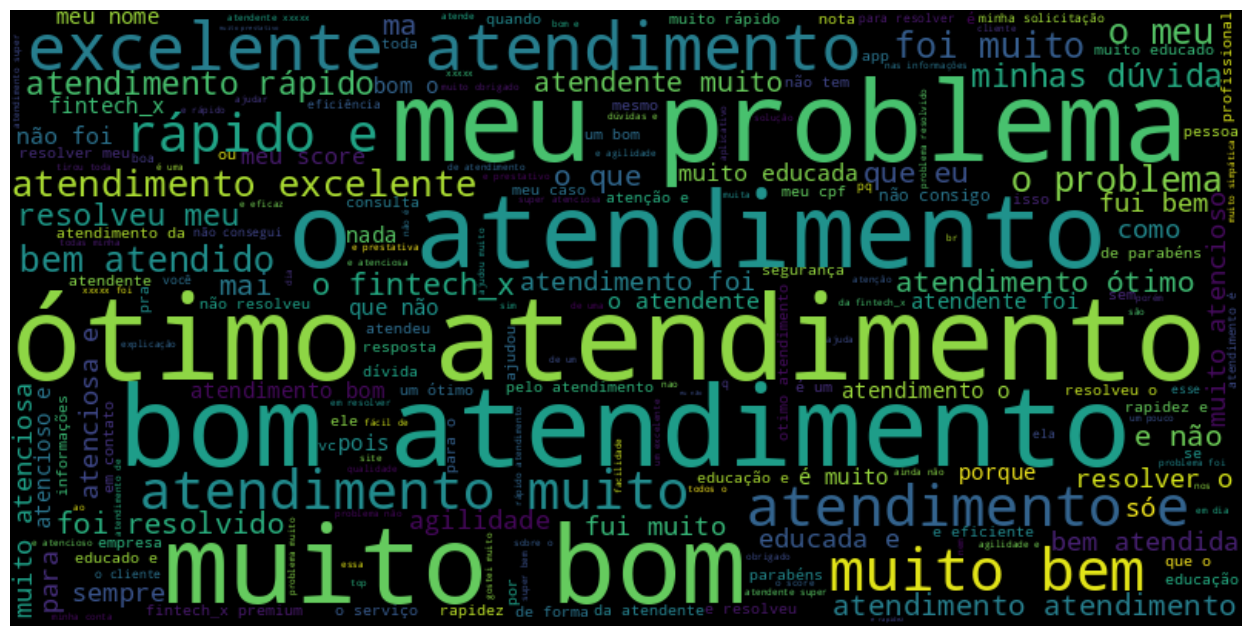

In [ ]:

df_sem_dup['Comentário'].fillna('', inplace=True)


text = ' '.join(df_sem_dup['Comentário'].astype(str))


text = text.lower()


text = re.sub(r'\d+', '', text)
text = re.sub(r'[^\w\s]', '', text)


wordcloud = WordCloud(width=800, height=400, background_color='black').generate(text)


import matplotlib.pyplot as plt
plt.figure(figsize=(16,8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

#Relação de Top de Nuvem de Palavras para piores e para melhores notas

In [ ]:
df_nps = df_nps.merge(df_sem_dup, on=['Nome', 'Data da Opinião', 'Produto', 'Escala', 'Campanha', 'Tribo Fintech_x01', 'Supervisão'], how='left')
df_nps

,Nome,Data da Opinião,Produto,Escala,Campanha,Tribo Fintech_x01,Supervisão,NPS,Nota,Comentário,Mes e Ano,Dia e Ano
0,AGENTE_1,2022-01-01,Portal,07:30 - 13:50,NPS - Central de Ajuda (Prod.),Central de Ajuda,Super_1,100.0,9,Atendente Atenciosa E Educada Disposta A Ajuda...,01-2022,01-2022
1,AGENTE_419,2023-02-02,Score,08:30 - 16:42,RV - Call Center,SAC,Super_25,100.0,10,Exelente Atendimento,02-2023,02-2023
2,AGENTE_419,2023-02-08,Score,08:30 - 16:42,RV - Call Center,SAC,Super_21,100.0,10,,02-2023,08-2023
3,AGENTE_419,2023-02-10,Outros,08:30 - 16:42,RV - Call Center,SAC,Super_21,100.0,10,A Praticidade Da Negociação,02-2023,10-2023
4,AGENTE_419,2023-02-10,Score,08:30 - 16:42,RV - Call Center,SAC,Super_21,100.0,10,"Atendente Super Atenciosa, Me Atendeu Muito Bem.",02-2023,10-2023
...,...,...,...,...,...,...,...,...,...,...,...,...
123954,AGENTE_88,2022-09-30,Score,11:50 - 20:02,RV - 0800 Premium,0800 Premium,Super_2,-100.0,5,Por Ser Uma Empresa De Monitoramento Pessoal C...,09-2022,30-2022
123955,AGENTE_458,2023-02-06,Limpa Nome,13:50 - 20:10,RV - Central de Ajuda,Central de Ajuda,Super_30,-100.0,3,Nao Estou Mais Satisfeito Com A Fintech_x01 De...,02-2023,06-2023
123956,AGENTE_126,2022-08-19,Negativação,07:40 - 14:00,NPS - Central de Ajuda (Prod.),Central de Ajuda,Super_15,-100.0,0,Paguei A Conta Pelo App Dia x De Agosto Até Ho...,08-2022,19-2022
123957,AGENTE_441,2022-12-08,Cadastro Positivo,11:50 - 20:02,RV - Call Center,Outros,Super_2,-100.0,5,,12-2022,08-2022


In [ ]:

low_notes = df_sem_dup[df_sem_dup['Nota'] < df_sem_dup['Nota'].mean()]


low_text = ' '.join(low_notes['Comentário'].astype(str))


low_text = low_text.lower()


stopwords = set(STOPWORDS)
stopwords.update(['que', 'para', 'com', 'uma', 'pra', 'por', 'tem', 'mas','mai','não','como'])
low_text = ' '.join([word for word in low_text.split() if len(word) > 2 and word not in stopwords])


low_wordcloud = WordCloud(width=800, height=400, background_color='white').generate(low_text)


high_notes = df_sem_dup[df_sem_dup['Nota'] >= df_sem_dup['Nota'].mean()]


high_text = ' '.join(high_notes['Comentário'].astype(str))


high_text = ' '.join([word for word in high_text.split() if len(word) > 2 and word not in stopwords])


high_wordcloud = WordCloud(width=800, height=400, background_color='white').generate(high_text)


fig, axes = plt.subplots(1, 2, figsize=(35, 35))
axes[0].imshow(low_wordcloud, interpolation='bilinear')
axes[0].set_title('Palavras mais frequentes para notas abaixo da média', fontsize=20)
axes[0].axis('off')
axes[1].imshow(high_wordcloud, interpolation='bilinear')
axes[1].set_title('Palavras mais frequentes para notas acima da média', fontsize=20)
axes[1].axis('off')
plt.show()


In [ ]:
import nltk
nltk.download('stopwords')
nltk.download('rslp')


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package rslp to /root/nltk_data...
[nltk_data]   Unzipping stemmers/rslp.zip.


True

In [ ]:
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
import nltk
nltk.download('punkt')
stop_words = set(stopwords.words('portuguese'))
text = 'Este é um exemplo de texto que será pré-processado.'
tokens = word_tokenize(text)
filtered_tokens = [word for word in tokens if not word in stop_words]


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


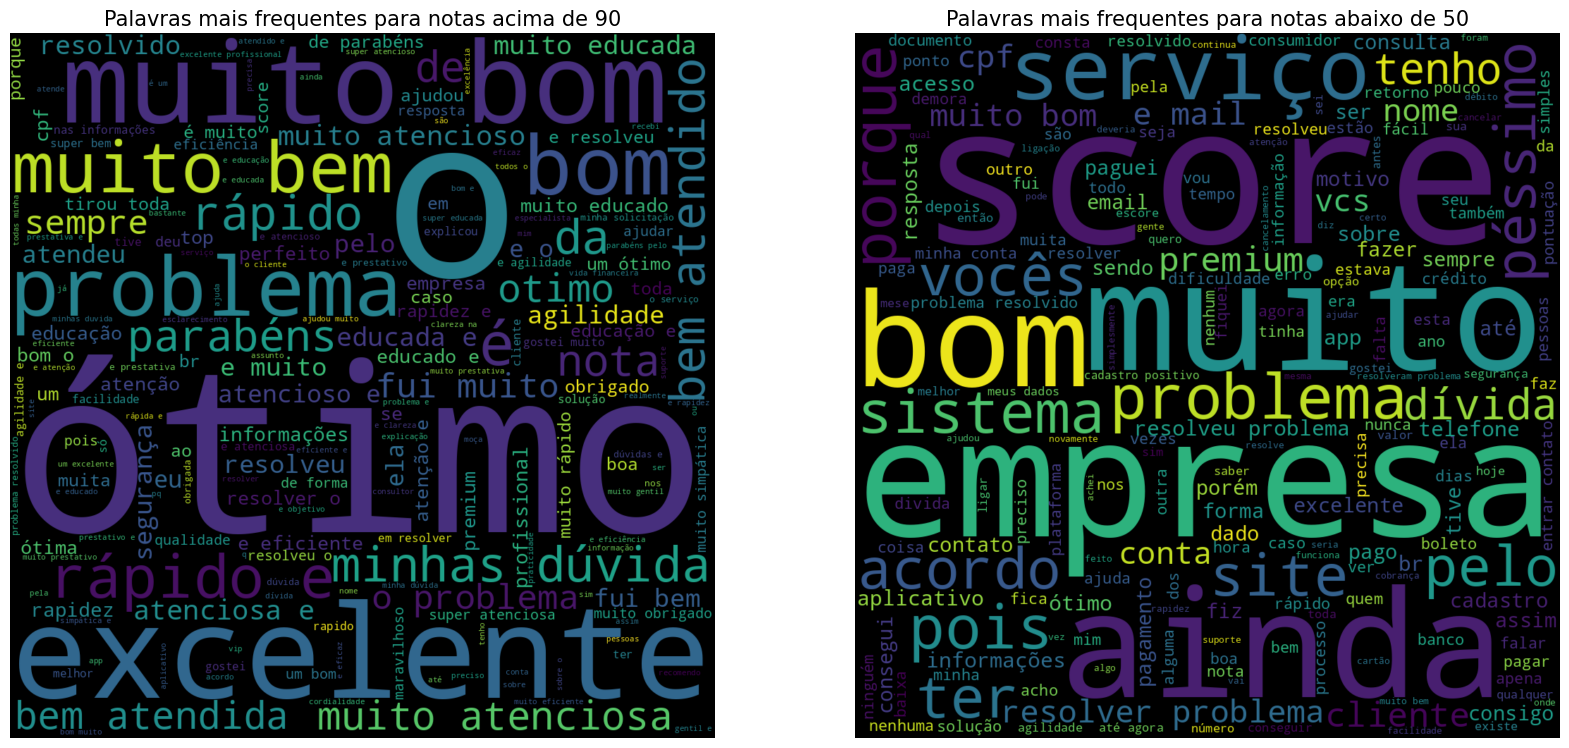

In [ ]:
# Filtrar as notas acima de 90 e abaixo de 70
high_notes = df_nps[df_nps['NPS'] > 90]
low_notes = df_nps[df_nps['NPS'] < 10]

# Juntar os comentários em uma única string
high_text = ' '.join(high_notes['Comentário'].astype(str))
low_text = ' '.join(low_notes['Comentário'].astype(str))

# Converter para letras minúsculas
high_text = high_text.lower()
low_text = low_text.lower()

# Adicionar stopwords personalizados e gerar a nuvem de palavras para notas altas
stopwords = set(STOPWORDS)
stopwords.update(['que', 'para', 'com', 'uma', 'pra', 'por', 'tem', 'mas', 'não', 'como','atendimento','atendente','fintech_x01','quando' ,' ','foi','mesmo','isso','nem','nao','dia','pessoa','sem','estou','mai','nada','esse','está','mais'
,'você','mais','ele','meu','essa','vc','tudo', 'xxxxx'


])
low_text = ' '.join([word for word in low_text.split() if len(word) > 2 and word not in stopwords])

high_wordcloud = WordCloud(width=1000, height=1000, background_color='black', stopwords=stopwords).generate(high_text)

# Gerar a nuvem de palavras para notas baixas
low_wordcloud = WordCloud(width=1000, height=1000, background_color='black', stopwords=stopwords).generate(low_text)

# Mostrar as nuvens de palavras
fig, axes = plt.subplots(1, 2, figsize=(20, 10))
axes[0].imshow(high_wordcloud, interpolation='bilinear')
axes[0].set_title('Palavras mais frequentes para notas acima de 90', fontsize=15)
axes[0].axis('off')
axes[1].imshow(low_wordcloud, interpolation='bilinear')
axes[1].set_title('Palavras mais frequentes para notas abaixo de 50', fontsize=15)
axes[1].axis('off')
plt.show()



##Responder as perguntas:




1.   Qual produto tem o maior NPS?

 B2B com 100%


2.   Qual o pareto de impacto de menor NPS, pelas diversas situações?  Alerta de Documentos

In [ ]:
# Definir o limiar de NPS
limiar_nps = 50

# Filtrar os dados pelo limiar de NPS
df_nps_filtrado = df_nps[df_nps['NPS'] <= limiar_nps]

# Agrupar os dados filtrados pela situação
df_nps_agrupado = df_nps_filtrado.groupby('Produto')['NPS'].mean().reset_index()

# Ordenar os valores de média de NPS em ordem crescente
df_nps_agrupado = df_nps_agrupado.sort_values('NPS')

# Calcular a frequência acumulada
df_nps_agrupado['freq_acumulada'] = 100 * df_nps_agrupado['NPS'].cumsum() / df_nps_agrupado['NPS'].sum()

# Encontrar o número de situações que representam 80% do impacto de menor NPS
situações_80_percent = df_nps_agrupado[df_nps_agrupado['freq_acumulada'] <= 80]['Produto'].nunique()

print("Número de situações que representam 80% do impacto de menor NPS:", situações_80_percent)


Número de situações que representam 80% do impacto de menor NPS: 7


3 - fazer um gráfico pareto

In [ ]:
prod_freq = df_nps['Produto'].value_counts()

prod_cumsum = prod_freq.cumsum()

prod_pct_cumsum = 100 * prod_cumsum / prod_freq.sum()

pareto_data = pd.DataFrame({
    'Produto': prod_freq.index,
    'Frequência': prod_freq.values,
    'Frequência acumulada (%)': prod_pct_cumsum.values
})


fig = make_subplots(specs=[[{"secondary_y": True}]])


fig.add_trace(
    go.Bar(x=pareto_data['Produto'], y=pareto_data['Frequência'], name='Frequência', marker=dict(color='steelblue')),
    secondary_y=False
)


fig.add_trace(
    go.Scatter(x=pareto_data['Produto'], y=pareto_data['Frequência acumulada (%)'], name='Pareto', mode='lines+markers', line=dict(color='red', width=2)),
    secondary_y=True
)


fig.update_layout(
    title='Gráfico Pareto das Opiniões',
    xaxis=dict(title='Produto'),
    yaxis=dict(title='Frequência', range=[0, prod_freq.max()+5]), # adicionar um valor de 5 para dar espaço à curva de Pareto
    yaxis2=dict(title='Frequência acumulada (%)', overlaying='y', side='right'),
    legend=dict(x=1.1, y=1.0),
    margin=dict(b=50) # adiciona uma margem inferior de 50 pixels
)

fig.update_layout(template='plotly_dark')

fig.show()

4.   Quais são os agentes reincidentes no 4T no último bimestre?

In [ ]:
last_bim = df_sem_dup[df_sem_dup['Data da Opinião'].between('2022-10-01', '2022-12-31')]
agent_counts = last_bim.groupby('Nome')['Nome'].count().reset_index(name='Ocorrências')
repeat_agents = agent_counts[agent_counts['Ocorrências'] > 1]['Nome'].tolist()
df_repeat_agents = pd.DataFrame({'Agentes reincidentes no 4T do último bimestre': repeat_agents})
df_repeat_agents

,Agentes reincidentes no 4T do último bimestre
0,AGENTE_1
1,AGENTE_10
2,AGENTE_100
3,AGENTE_101
4,AGENTE_102
...,...
240,AGENTE_88
241,AGENTE_89
242,AGENTE_92
243,AGENTE_95


5.   Qual é o ponto de impacto do menor NPS?  OCR - IDWAL

6.   Há sazonalidade dentro do ano e do mês? 

* Base na análise dos dados, é possível afirmar que há sazonalidade tanto dentro do ano quanto do mês. A partir do mês de outubro de 2022, há uma queda expressiva nos nps, Pode ser um sinal de que algo está afetando a qualidade do serviço prestado.

#*Conclusão:* 

* Pode-se concluir que existem diversas áreas em que a empresa precisa melhorar para aumentar a pontuação do NPS e proporcionar uma melhor experiência ao cliente. Algumas dessas áreas incluem o desempenho do produto OCR - IDWALL, a supervisão da equipe Super_16 e o ​​desempenho de alguns agentes específicos.

* Para melhorar a pontuação do NPS do produto OCR - IDWALL, seria necessário avaliar os pontos críticos que mais impactam na experiência do cliente e trabalhar para melhorá-los. Isso pode envolver uma análise mais detalhada da usabilidade do produto, a qualidade do suporte técnico e a facilidade de integração com outras soluções.

* Em relação à equipe Super_16, seria necessário avaliar o desempenho individual dos agentes e identificar os pontos em que eles podem melhorar. Isso pode envolver a realização de treinamentos para melhorar habilidades específicas, como comunicação ou resolução de problemas.

* Por fim, em relação aos agentes que tiveram um NPS extremamente baixo, seria necessário avaliar as causas desses resultados e tomar medidas corretivas. Isso pode envolver uma identificação de problemas no desempenho individual, uma avaliação da qualidade do suporte oferecido ou uma identificação de problemas com o produto ou serviço em si.

* No geral, é importante uma análise cuidadosa das áreas que precisam de melhorias e implemente medidas corretivas para garantir que seus clientes tenham uma experiência positiva e aumentem a pontuação do NPS.



# Conclusão técnica 

**O texto da conclusão foi elaborado com base nos esees dados**  

* Os dados técnicos revelaram que o produto OCR - IDWALL teve um NPS negativo de -1,57, indicando que afetou exerceu a experiência do cliente. Por outro lado, o produto OCR teve um NPS positivo de 14,21 e o produto S/INFO teve um NPS de 25,23. É necessário investigar por que o produto S/INFO não foi identificado. 

* Na supervisão, a equipe Super_16 teve um NPS de 10,96, bem abaixo do esperado, enquanto a equipe Super_3 obteve um NPS de 33,66, demonstrando desempenho superior. As equipes Super_28 e Super_27 tiveram desempenho ainda melhor, com NPS de 40,00 e 45,24, respectivamente. Embora essas equipes tenham mostrado desempenho superior em comparação com o Super_16, ainda há espaço para melhorias em suas pontuações de NPS, principalmente quando ocorreram às 5 melhores equipes. 

* É importante notar que alguns agentes tiveram NPS extremamente baixos, enquanto outros apresentaram NPS neutros ou positivos. A tribo Fintech_x01 apresentou um desempenho ruim em relação ao NPS, com vários produtos e áreas com quadrantes ruins. É necessário realizar ações para melhorar a experiência do cliente nessas áreas e aumentar o NPS.